In [1]:
from sentinelhub import SHConfig


INSTANCE_ID = ''  # In case you put instance ID into configuration file you can leave this unchanged

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sentinelhub import WcsRequest, MimeType, CRS, BBox

In [5]:
#initialize wcs request

def get_bands_request(coords, year):
    
    #set date range
    date1 = year + '-03-01'
    date2 = year + '-04-30'
    
    #make bounding box
    box = BBox(bbox=coords, crs=CRS.WGS84)
    
    #specify request arguments
    wcs_bands_request = WcsRequest(
        layer='BANDS-S2-L1C',
        bbox=box,
        time=(date1, date2),
        resx = '10m',
        resy = '10m',
        image_format=MimeType.TIFF_d32f,
        time_difference=datetime.timedelta(hours=2),
        maxcc = 0.9,
        config=config
    )
    
    return wcs_bands_request

In [10]:
#get images
def get_images(wcs_bands_request):
    
    wcs_bands_img = wcs_bands_request.get_data()
    
    return wcs_bands_img

In [6]:
#save images

def save_images(wcs_bands_request, wcs_bands_img, location, year):
    
    #get dates of images and convert to strings
    dates = wcs_bands_request.get_dates()
    date_strings = [datetime.datetime.strftime(date, '%Y-%m-%d') for date in dates]
    
    #save each 3D array as a separate file
    for name, img in zip(date_strings, wcs_bands_img):
        
        print(name)
        
        #build filename
        filename = '/home/esther/shared/' + name + '_' + location
        
        #save as .npy file
        np.save(filename, img)

In [29]:
#set bounding box coordinates for different locations

#Lake Elsinore
elsinore_coords = [-117.34, 33.72, -117.44, 33.8]

#Grass Mountain
grassmtn_coords = [-120.02, 34.75, -120.11, 34.82]

#Antelope Valley
antelope_coords = [-118.4, 34.72, -118.32, 34.79]

#Carrizo Plains - for another time
carrizo_coords = [-119.59, 35.05, -119.69, 35.14]

In [42]:
#put it all together

#change these variables as needed
location = 'antelope'
coords = antelope_coords
year = '2020'

#set up request
%time wcs_bands_request = get_bands_request(coords, year)

CPU times: user 41.8 ms, sys: 779 µs, total: 42.6 ms
Wall time: 873 ms


In [43]:
#get images
%time wcs_bands_img = get_images(wcs_bands_request)

CPU times: user 3.26 s, sys: 999 ms, total: 4.26 s
Wall time: 50.1 s


In [44]:
#save images
save_images(wcs_bands_request, wcs_bands_img, location, year)

2020-03-04
2020-03-14
2020-03-19
2020-03-24
2020-03-29
2020-04-03
2020-04-13
2020-04-18
2020-04-23
2020-04-28


In [ ]:
#set date range
year = '2019'
date1 = year + '-02-01'
date2 = year + '-05-31'
box = BBox(bbox=elsinore_coords, crs=CRS.WGS84)
    
#specify request arguments
wcs_bands_request = WcsRequest(
    layer='BANDS-S2-L1C',
    bbox=box,
    time=(date1, date2),
    resx = '10m',
    resy = '10m',
    image_format=MimeType.TIFF_d32f,
    time_difference=datetime.timedelta(hours=2),
    config=config
)

In [ ]:
%time wcs_bands_img = wcs_bands_request.get_data()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
img = wcs_bands_img[0][:, :, [3,2,1]]
dat = ax.imshow(np.minimum(img * 5, 1))

In [ ]:
wcs_bands_request = WcsRequest(
    layer='BANDS-S2-L1C',
    bbox=grassmtn_bbox,
    time='2019-03-18',
    resx = '10m',
    resy = '10m',
    image_format=MimeType.TIFF_d32f,
    config=config
)

In [ ]:
%%time
wcs_bands_img_grassmtn = wcs_bands_request.get_data()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
img = wcs_bands_img_grassmtn[0][:, :, [3,2,1]]
dat = ax.imshow(np.minimum(img * 5, 1))

In [ ]:
wcs_bands_request = WcsRequest(
    layer='BANDS-S2-L1C',
    bbox=carrizo_bbox,
    time='2019-04-07',
    resx = '10m',
    resy = '10m',
    image_format=MimeType.TIFF_d32f,
    time_difference=datetime.timedelta(hours=2),
    config=config
)

In [ ]:
%%time
wcs_bands_img_carrizo = wcs_bands_request.get_data()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
img = wcs_bands_img_carrizo[0][:, :, [3,2,1]]
dat = ax.imshow(np.minimum(img * 5, 1))

In [33]:
antelope_coords = [-118.4, 34.72, -118.32, 34.79]
antelope_box = BBox(bbox=antelope_coords, crs=CRS.WGS84)

wcs_bands_request = WcsRequest(
    layer='BANDS-S2-L1C',
    bbox=antelope_box,
    time='2020-04-13',
    resx = '10m',
    resy = '10m',
    image_format=MimeType.TIFF_d32f,
    config=config
)

In [34]:
%%time
wcs_bands_img_antelope = wcs_bands_request.get_data()

CPU times: user 349 ms, sys: 142 ms, total: 491 ms
Wall time: 10.6 s


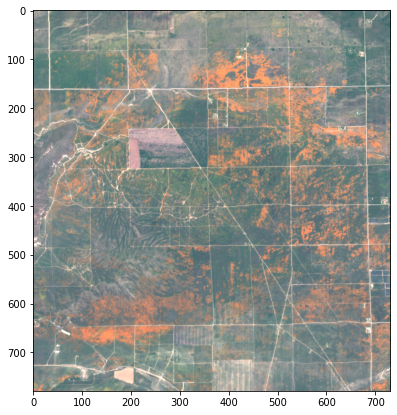

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
img = wcs_bands_img_antelope[0][:, :, [3,2,1]]
dat = ax.imshow(np.minimum(img * 5, 1))